In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
import joblib

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Robot and AI/Project/Loan Approval/Loan Approval.csv')

In [72]:
df['loan_status'].value_counts()

,count
loan_status,
0,47126
1,8292


In [4]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [5]:
df.shape

(58645, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [7]:
df[df.duplicated()]

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status


In [8]:
df.isnull().sum()

,0
id,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0


In [4]:
df = df.drop(['id'], axis=1)
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [5]:
cat_col = [col for col in df.columns if df[col].dtypes == 'object']
cat_col

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [6]:
num_col = [col for col in df.columns if df[col].dtypes != 'object']
num_col

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'loan_status']

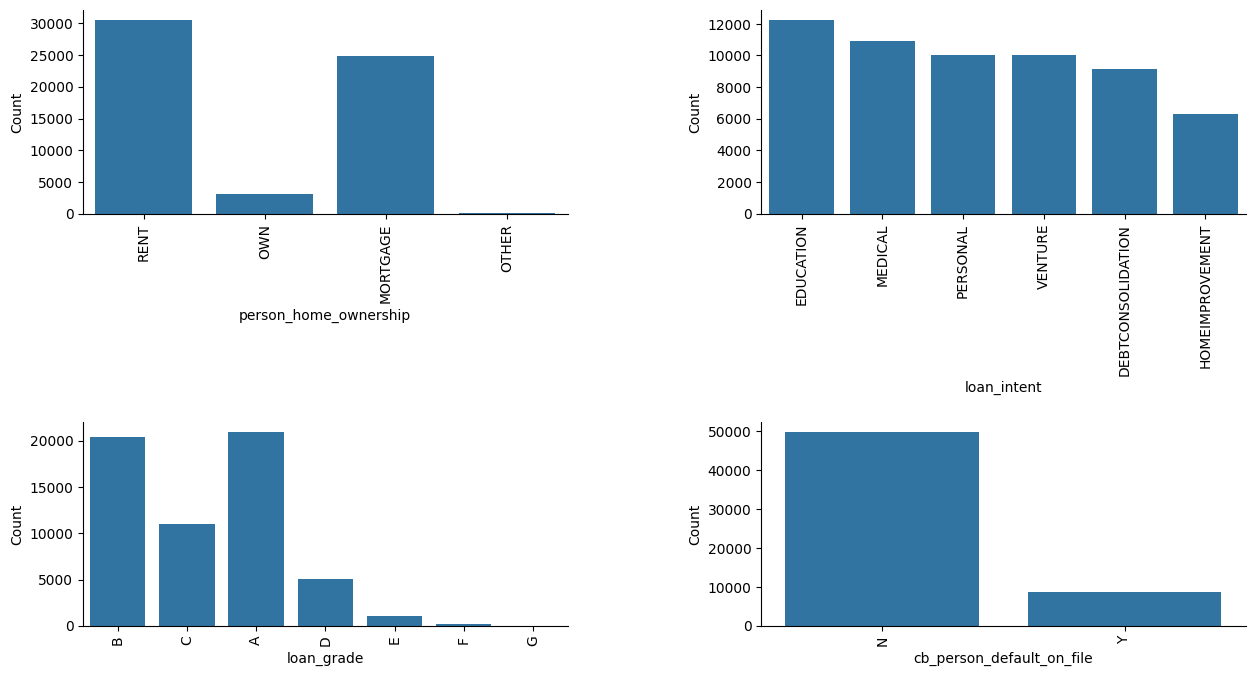

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
fig.subplots_adjust(hspace = 1.02, wspace = 0.4)
axes = axes.flatten()
for i, col in enumerate(cat_col):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis = 'x', rotation = 90)

sns.despine()
plt.show()

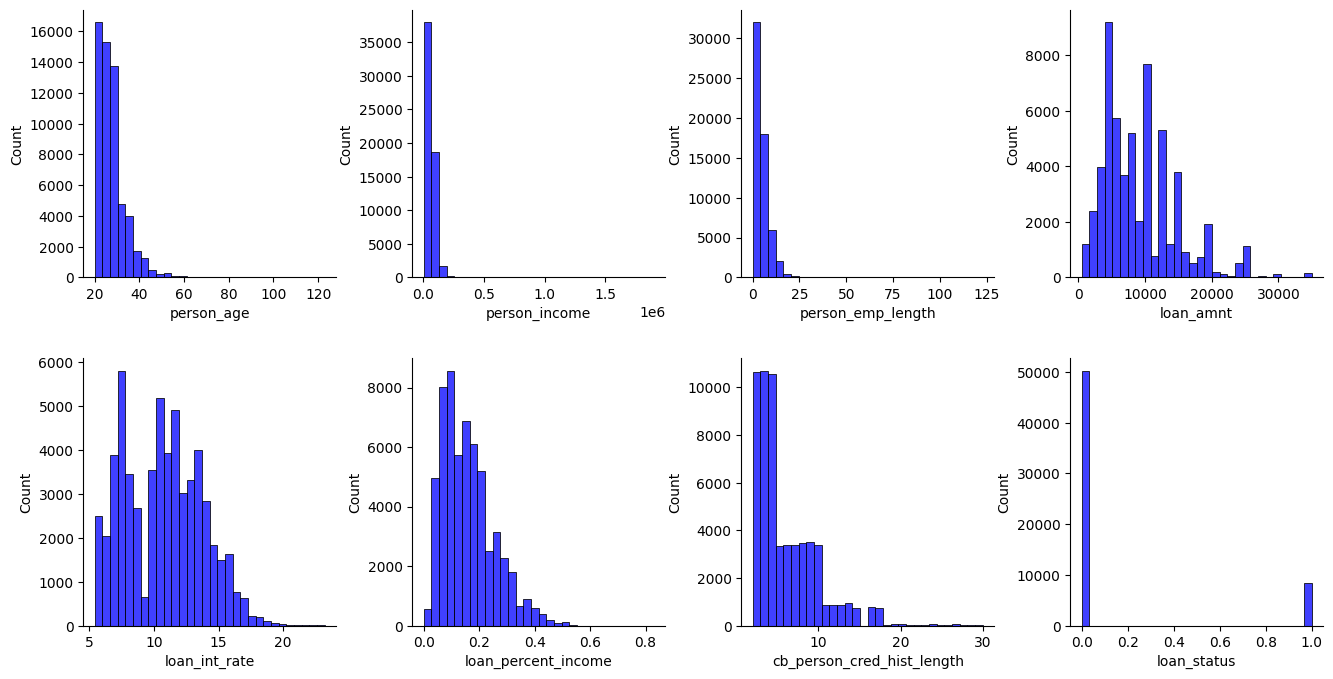

In [13]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.subplots_adjust(hspace = 0.3, wspace = 0.3)
axes = axes.flatten()

for i, col in enumerate(num_col):
    sns.histplot(df[col], kde = False, bins = 30, ax = axes[i], color = "blue")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

sns.despine()
plt.show()

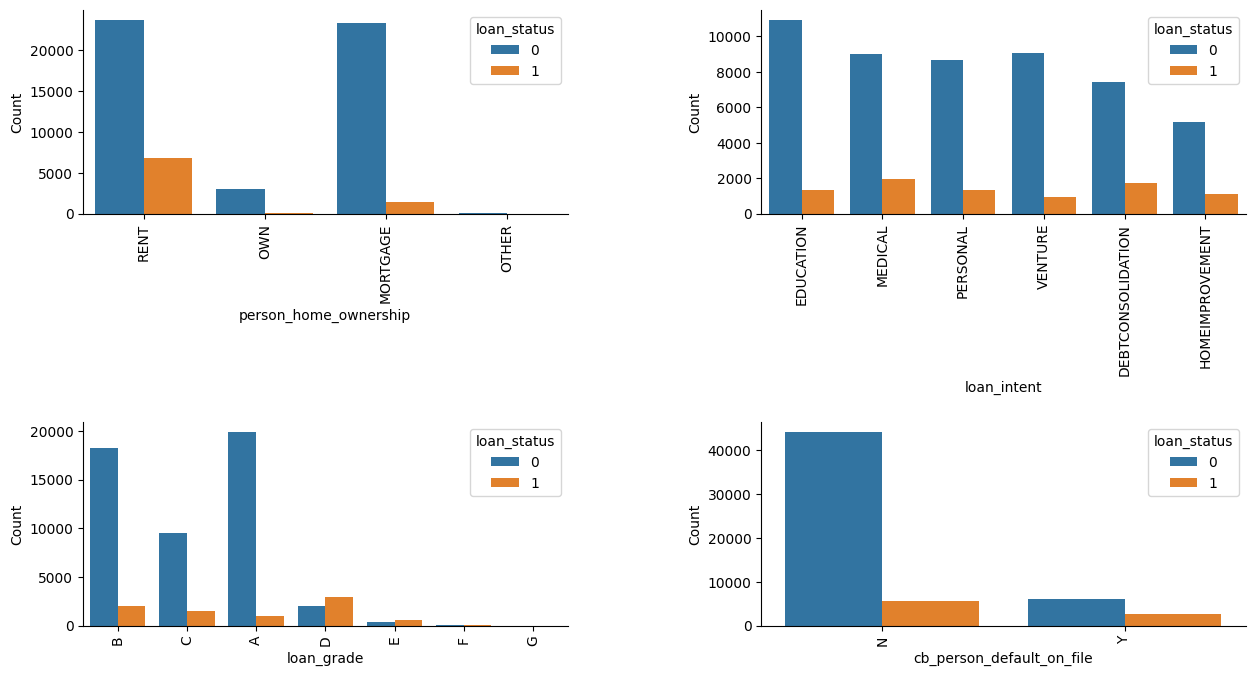

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
fig.subplots_adjust(hspace = 1.02, wspace = 0.4)
axes = axes.flatten()
for i, col in enumerate(cat_col):
    sns.countplot(x=col, data=df, hue='loan_status', ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis = 'x', rotation = 90)

sns.despine()
plt.show()

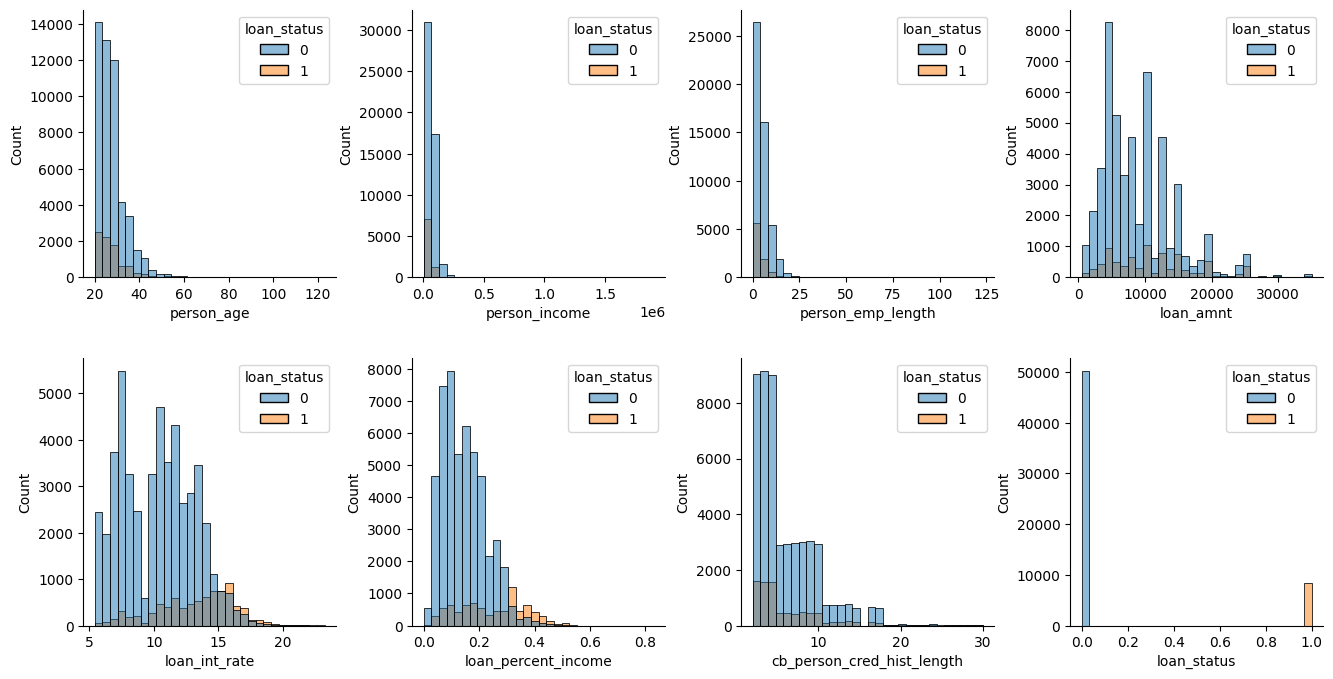

In [15]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.subplots_adjust(hspace = 0.3, wspace = 0.3)
axes = axes.flatten()

for i, col in enumerate(num_col):
    sns.histplot(data=df, x=col, hue='loan_status', kde = False, bins = 30, ax = axes[i], color = "blue")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

sns.despine()
plt.show()

In [7]:
df.drop(df[df['person_home_ownership'] == 'OWN'].index, inplace=True)
df.drop(df[df['person_home_ownership'] == 'OTHER'].index, inplace=True)

In [6]:
df.shape

(55418, 13)

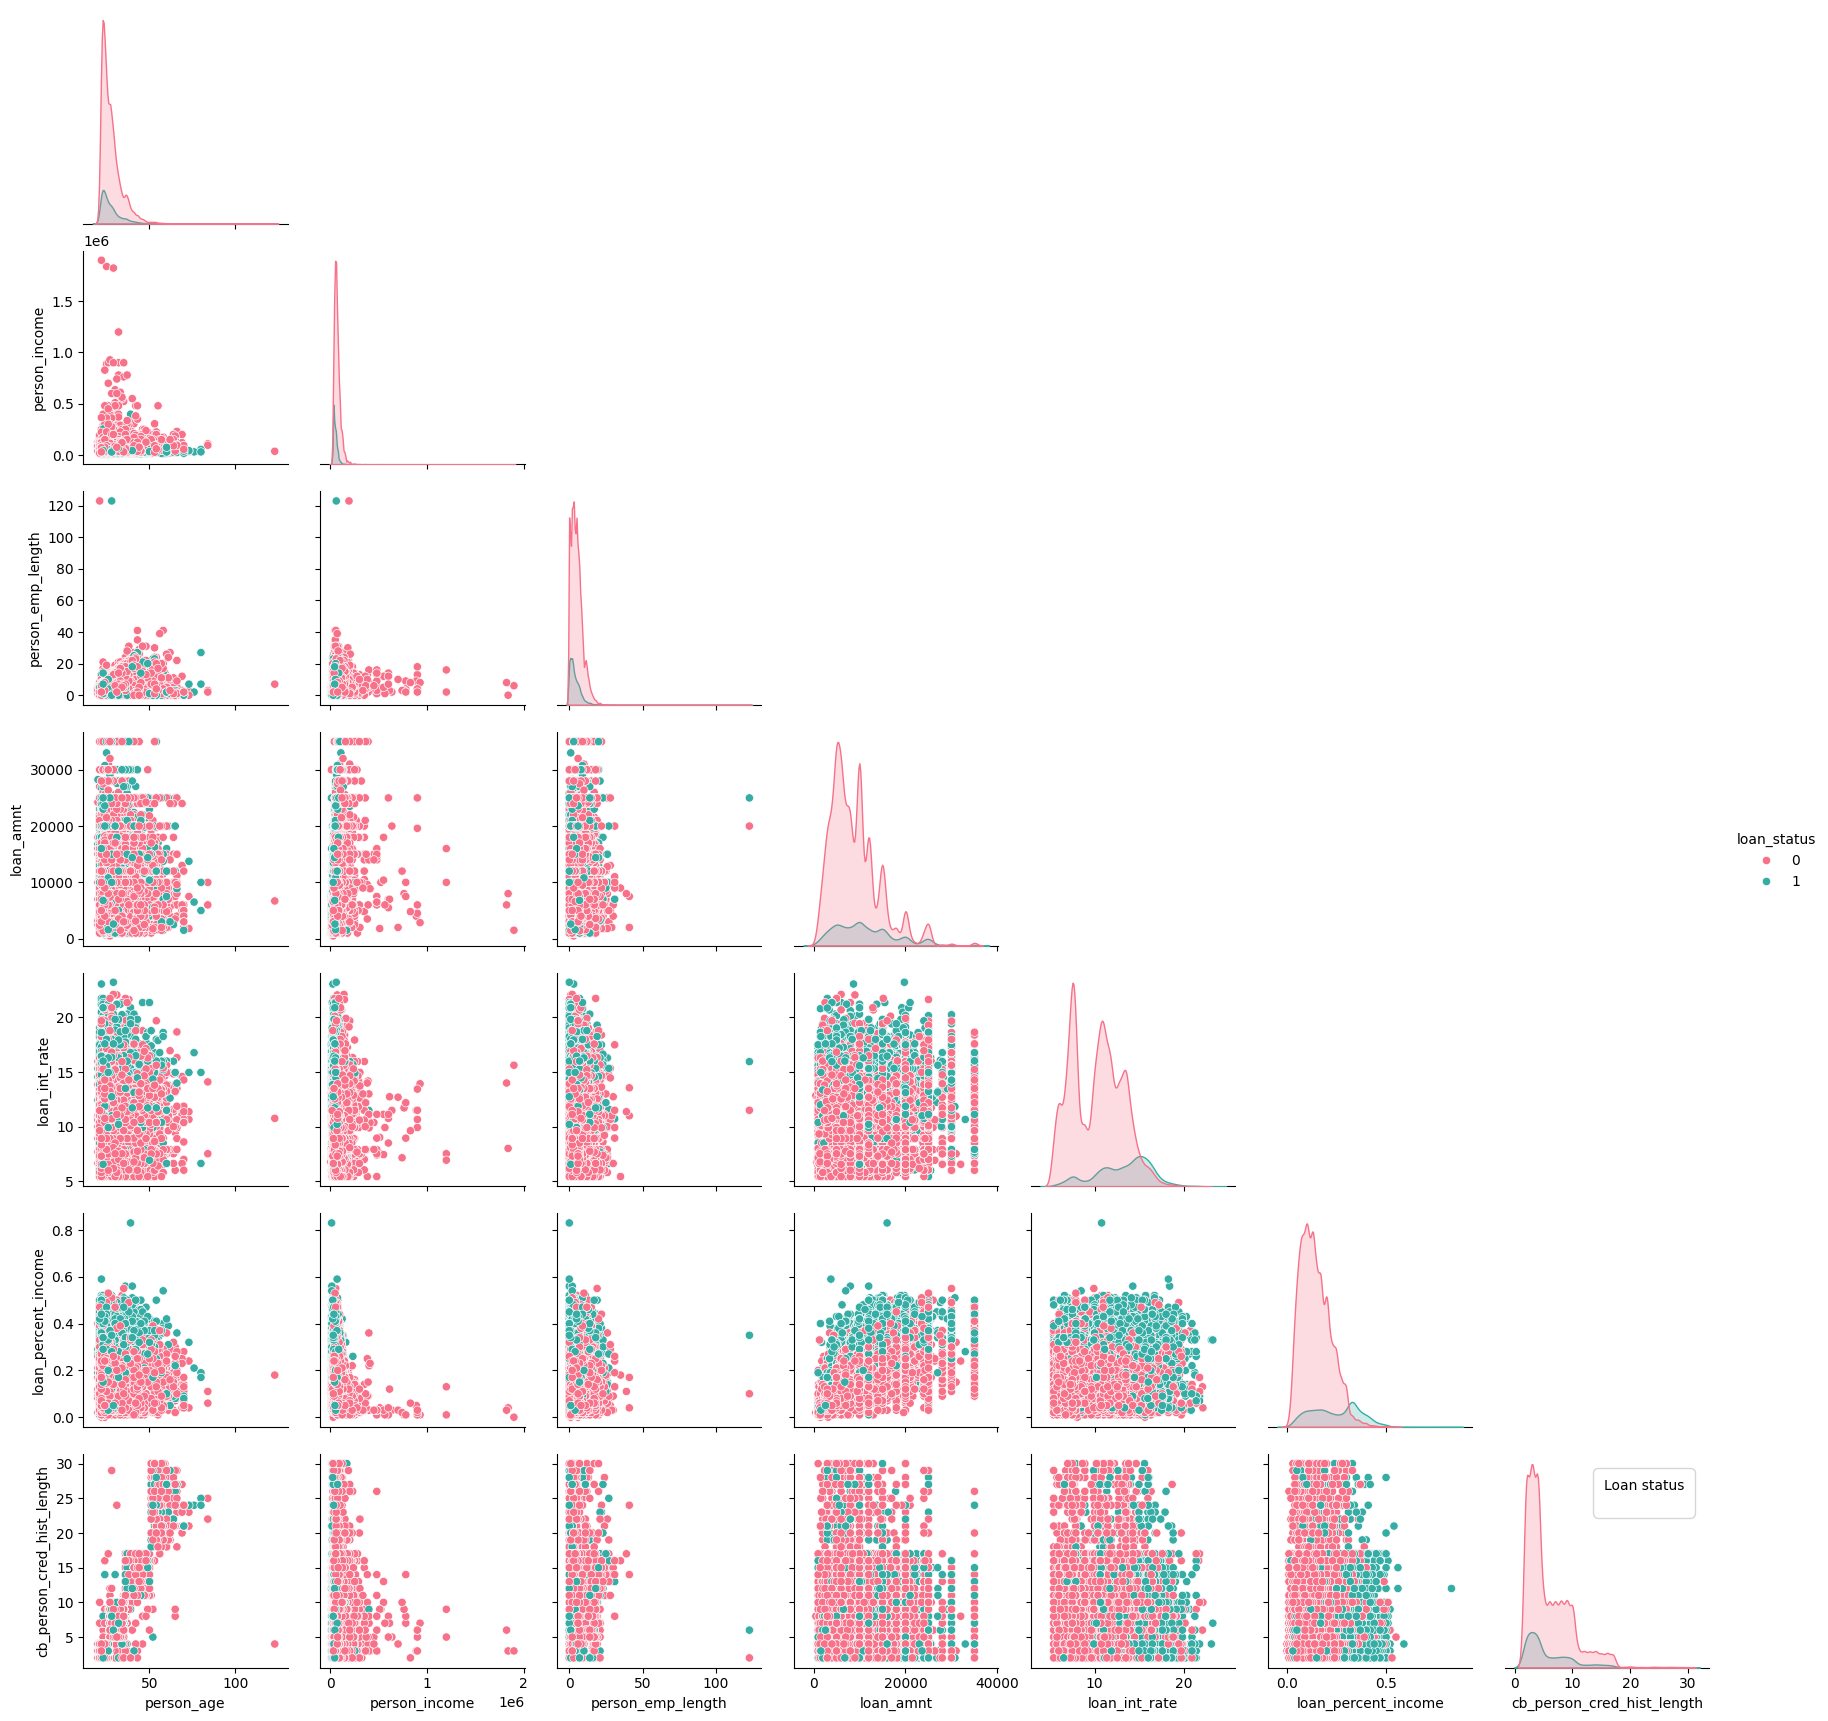

In [9]:
sns.pairplot(df, hue="loan_status", corner = True, palette="husl")
plt.legend(title = "Loan status", fontsize = 20)

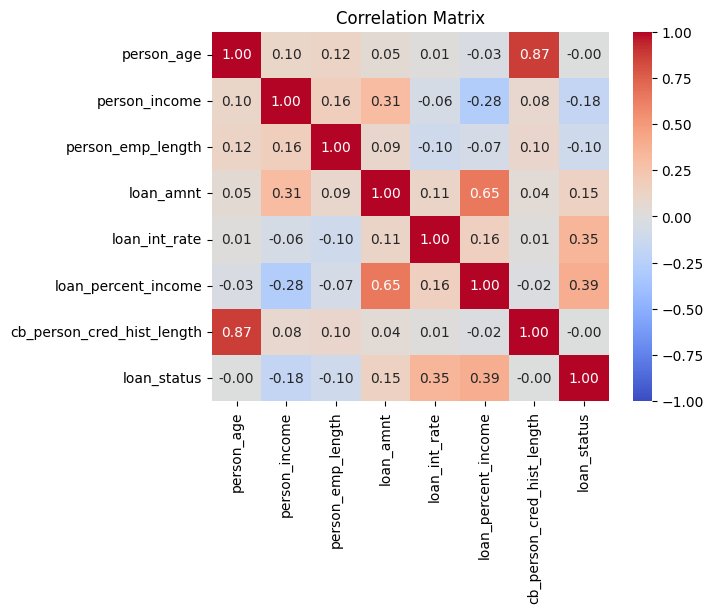

In [10]:
corr = df.corr(numeric_only = True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", vmax = 1, vmin = -1)
plt.title("Correlation Matrix")
plt.show()

In [8]:
df[(df['loan_int_rate'] <= 15) | (df['loan_percent_income'] <= 0.3)]['loan_status'].value_counts()

,count
loan_status,
0,47036
1,7739


In [43]:
shuffle_sample = df[(df['loan_int_rate'] <= 15) | (df['loan_percent_income'] <= 0.3)][df['loan_status'] == 0].sample(frac=1, random_state=42)
subsample = pd.concat([df[df['loan_status'] == 1], shuffle_sample[:8292]])
subsample

<ipython-input-43-b365a6040d83>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  shuffle_sample = df[(df['loan_int_rate'] <= 15) | (df['loan_percent_income'] <= 0.3)][df['loan_status'] == 0].sample(frac=1, random_state=42)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
11,22,33000,RENT,6.0,PERSONAL,B,10000,11.12,0.30,N,2,1
24,22,30000,RENT,3.0,MEDICAL,D,5000,16.49,0.17,N,4,1
25,25,25000,RENT,3.0,VENTURE,C,3500,13.49,0.14,Y,3,1
38,30,54000,RENT,0.0,MEDICAL,B,12500,11.71,0.24,N,10,1
39,22,32000,RENT,6.0,EDUCATION,D,8000,15.58,0.25,N,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
33033,23,75000,MORTGAGE,3.0,VENTURE,B,6000,11.48,0.08,N,4,0
39288,33,34000,RENT,7.0,MEDICAL,C,6000,13.57,0.18,Y,7,0
4061,40,65000,MORTGAGE,7.0,MEDICAL,A,12000,8.94,0.18,N,12,0
27824,23,60000,MORTGAGE,3.0,PERSONAL,A,10000,7.88,0.17,N,2,0


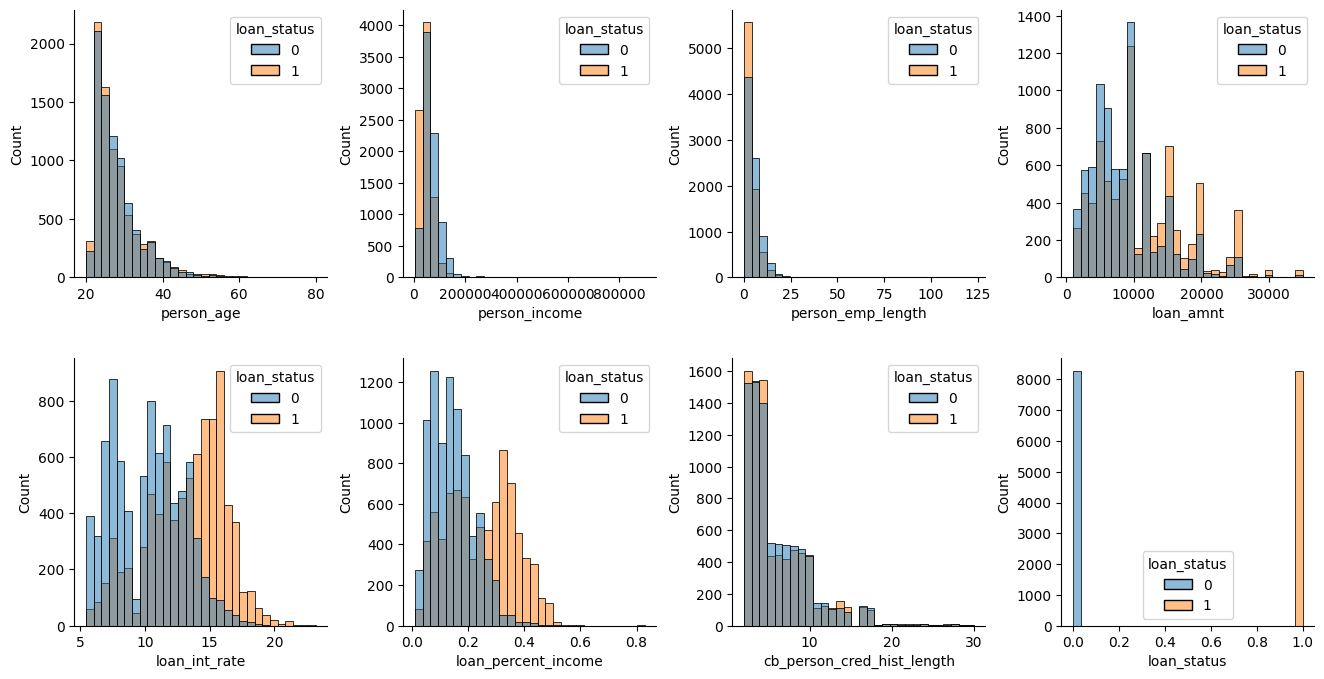

In [44]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.subplots_adjust(hspace = 0.3, wspace = 0.3)
axes = axes.flatten()

for i, col in enumerate(num_col):
    sns.histplot(data=subsample, x=col, hue='loan_status', kde = False, bins = 30, ax = axes[i], color = "blue")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

sns.despine()
plt.show()

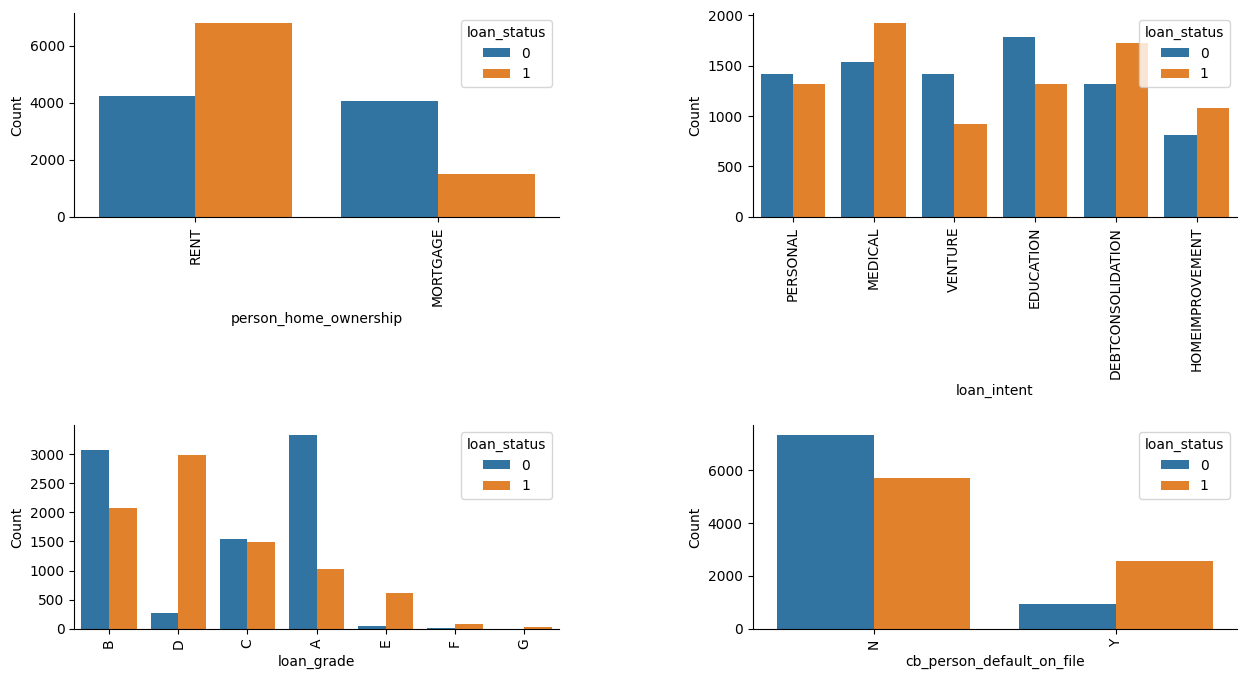

In [45]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
fig.subplots_adjust(hspace = 1.02, wspace = 0.4)
axes = axes.flatten()
for i, col in enumerate(cat_col):
    sns.countplot(x=col, data=subsample, hue='loan_status', ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis = 'x', rotation = 90)

sns.despine()
plt.show()

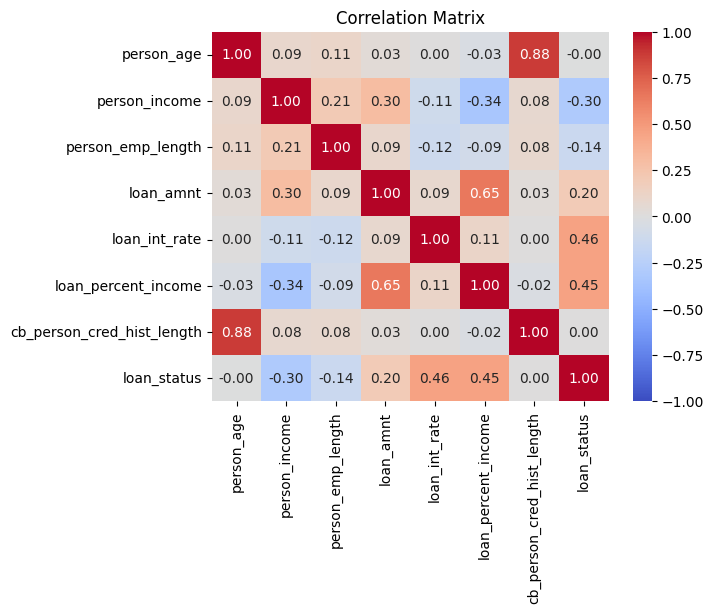

In [46]:
corr = subsample.corr(numeric_only = True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", vmax = 1, vmin = -1)
plt.title("Correlation Matrix")
plt.show()

In [47]:
subsample.loc[subsample['loan_status'] == 0, 'loan_status'] = -1
subsample['loan_status'].value_counts()

,count
loan_status,
1,8292
-1,8292


In [48]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [49]:
mod_subsample = one_hot_encoder(subsample, cat_col, drop_first=False)

In [50]:
mod_subsample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16584 entries, 11 to 28734
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      16584 non-null  int64  
 1   person_income                   16584 non-null  int64  
 2   person_emp_length               16584 non-null  float64
 3   loan_amnt                       16584 non-null  int64  
 4   loan_int_rate                   16584 non-null  float64
 5   loan_percent_income             16584 non-null  float64
 6   cb_person_cred_hist_length      16584 non-null  int64  
 7   loan_status                     16584 non-null  int64  
 8   person_home_ownership_MORTGAGE  16584 non-null  bool   
 9   person_home_ownership_RENT      16584 non-null  bool   
 10  loan_intent_DEBTCONSOLIDATION   16584 non-null  bool   
 11  loan_intent_EDUCATION           16584 non-null  bool   
 12  loan_intent_HOMEIMPROVEMENT     1658

In [51]:
bool_col = [col for col in mod_subsample.columns if mod_subsample[col].dtypes == 'bool']
mod_subsample[bool_col] = mod_subsample[bool_col].astype(int)

In [52]:
mod_subsample.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status,person_home_ownership_MORTGAGE,person_home_ownership_RENT,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
11,22,33000,6.0,10000,11.12,0.30,2,1,0,1,...,0,0,1,0,0,0,0,0,1,0
24,22,30000,3.0,5000,16.49,0.17,4,1,0,1,...,0,0,0,0,1,0,0,0,1,0
25,25,25000,3.0,3500,13.49,0.14,3,1,0,1,...,1,0,0,1,0,0,0,0,0,1
38,30,54000,0.0,12500,11.71,0.24,10,1,0,1,...,0,0,1,0,0,0,0,0,1,0
39,22,32000,6.0,8000,15.58,0.25,3,1,0,1,...,0,0,0,0,1,0,0,0,1,0


In [53]:
scaler = MinMaxScaler()
mod_subsample[['person_income', 'loan_amnt']] = scaler.fit_transform(mod_subsample[['person_income', 'loan_amnt']])

In [54]:
mod_subsample.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status,person_home_ownership_MORTGAGE,person_home_ownership_RENT,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
11,22,0.032150,6.0,0.264706,11.12,0.30,2,1,0,1,...,0,0,1,0,0,0,0,0,1,0
24,22,0.028801,3.0,0.117647,16.49,0.17,4,1,0,1,...,0,0,0,0,1,0,0,0,1,0
25,25,0.023219,3.0,0.073529,13.49,0.14,3,1,0,1,...,1,0,0,1,0,0,0,0,0,1
38,30,0.055593,0.0,0.338235,11.71,0.24,10,1,0,1,...,0,0,1,0,0,0,0,0,1,0
39,22,0.031034,6.0,0.205882,15.58,0.25,3,1,0,1,...,0,0,0,0,1,0,0,0,1,0


In [55]:
train_dataset, test_dataset, train_label, test_label = train_test_split(mod_subsample.drop(columns=['loan_status']), mod_subsample['loan_status'], test_size=0.4, random_state=42)

In [56]:
train_dataset

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
6911,26,0.079238,9.0,0.147059,7.51,0.08,2,1,0,0,...,0,1,0,0,0,0,0,0,1,0
29331,24,0.046662,3.0,0.323529,11.48,0.26,2,0,1,0,...,0,0,1,0,0,0,0,0,1,0
22484,34,0.031034,2.0,0.411765,10.99,0.47,6,0,1,1,...,0,0,1,0,0,0,0,0,1,0
56502,22,0.063915,6.0,0.132353,16.49,0.07,3,1,0,0,...,0,0,0,0,1,0,0,0,0,1
12117,44,0.056709,2.0,0.117647,10.59,0.09,11,1,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35185,25,0.026564,5.0,0.117647,10.38,0.18,4,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4781,24,0.043313,4.0,0.264706,8.94,0.23,3,1,0,0,...,0,1,0,0,0,0,0,0,1,0
37621,21,0.016745,4.0,0.088235,16.49,0.21,2,0,1,0,...,0,0,0,0,1,0,0,0,0,1
5893,23,0.072338,2.0,0.264706,17.58,0.14,3,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [57]:
train_label.value_counts()

,count
loan_status,
-1,5027
1,4923


In [69]:
grid_params = {'C': [1, 10, 100], 'kernel': ['rbf', 'poly', 'sigmoid']}

In [58]:
model = SVC(kernel='linear', C=1)
model.fit(train_dataset, train_label)

SVC(C=1, kernel='linear')

In [59]:
pred = model.predict(test_dataset)

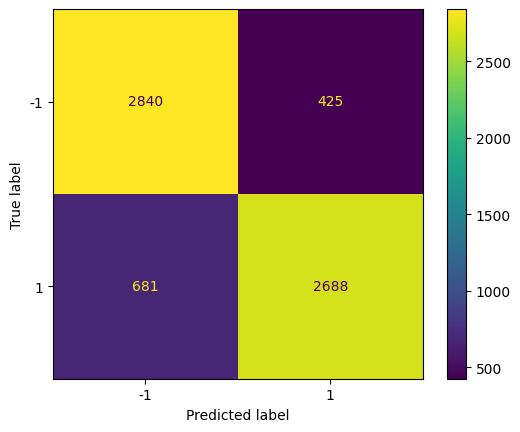

In [60]:
cm = confusion_matrix(test_label, pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [61]:
print(classification_report(pred, test_label))

              precision    recall  f1-score   support

          -1       0.87      0.81      0.84      3521
           1       0.80      0.86      0.83      3113

    accuracy                           0.83      6634
   macro avg       0.83      0.84      0.83      6634
weighted avg       0.84      0.83      0.83      6634



In [70]:
grid = GridSearchCV(SVC(), grid_params, refit = True, verbose = 3)
grid.fit(train_dataset, train_label)
grid_predictions = grid.predict(test_dataset)
print(classification_report(grid_predictions, test_label))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ...................C=1, kernel=rbf;, score=0.736 total time=   3.5s
[CV 2/5] END ...................C=1, kernel=rbf;, score=0.730 total time=   3.6s
[CV 3/5] END ...................C=1, kernel=rbf;, score=0.734 total time=   4.9s
[CV 4/5] END ...................C=1, kernel=rbf;, score=0.725 total time=   3.6s
[CV 5/5] END ...................C=1, kernel=rbf;, score=0.722 total time=   3.3s
[CV 1/5] END ..................C=1, kernel=poly;, score=0.747 total time=   6.5s
[CV 2/5] END ..................C=1, kernel=poly;, score=0.746 total time=   7.1s
[CV 3/5] END ..................C=1, kernel=poly;, score=0.743 total time=   4.3s
[CV 4/5] END ..................C=1, kernel=poly;, score=0.743 total time=   4.3s
[CV 5/5] END ..................C=1, kernel=poly;, score=0.747 total time=   3.8s
[CV 1/5] END ...............C=1, kernel=sigmoid;, score=0.474 total time=   4.2s
[CV 2/5] END ...............C=1, kernel=sigmoid;,

In [62]:
model2 = SVC(kernel='rbf', C=100)
model2.fit(train_dataset, train_label)

SVC(C=100)

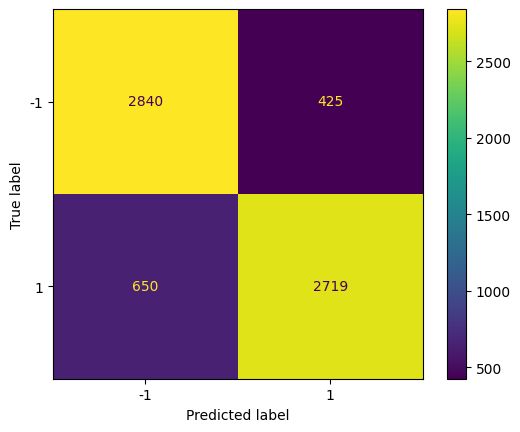

In [64]:
pred = model2.predict(test_dataset)
cm = confusion_matrix(test_label, pred, labels=model2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model2.classes_)
disp.plot()

In [65]:
print(classification_report(pred, test_label))

              precision    recall  f1-score   support

          -1       0.87      0.81      0.84      3490
           1       0.81      0.86      0.83      3144

    accuracy                           0.84      6634
   macro avg       0.84      0.84      0.84      6634
weighted avg       0.84      0.84      0.84      6634



In [66]:
model3 = SVC(kernel='poly', C=100)
model3.fit(train_dataset, train_label)

SVC(C=100, kernel='poly')

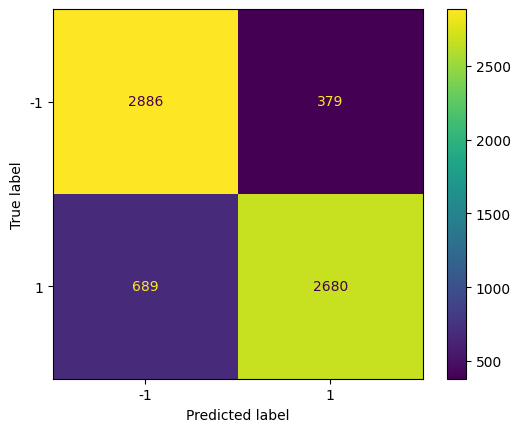

In [67]:
pred = model3.predict(test_dataset)
cm = confusion_matrix(test_label, pred, labels=model3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model3.classes_)
disp.plot()

In [68]:
print(classification_report(pred, test_label))

              precision    recall  f1-score   support

          -1       0.88      0.81      0.84      3575
           1       0.80      0.88      0.83      3059

    accuracy                           0.84      6634
   macro avg       0.84      0.84      0.84      6634
weighted avg       0.84      0.84      0.84      6634



In [71]:
joblib.dump(model2, '/content/drive/MyDrive/Robot and AI/Project/Loan Approval/model_rbf_100.pkl')

['/content/drive/MyDrive/Robot and AI/Project/Loan Approval/model_rbf_100.pkl']

In [41]:
joblib.dump(scaler, '/content/drive/MyDrive/Robot and AI/Project/Loan Approval/scaler.save')

['/content/drive/MyDrive/Robot and AI/Project/Loan Approval/scaler.save']